In [57]:
import pandas as pd

# Read the CSV file and create a dataframe
df = pd.read_csv('turtle.csv')

In [58]:
df.head()
#Yearly Salary/Income

,age,income,Bird_rating
0,33,66400,1
1,40,55600,-2
2,76,73400,-1
3,46,73200,-4
4,47,72300,-4


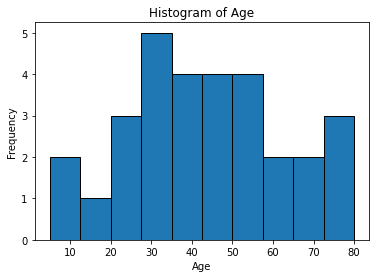

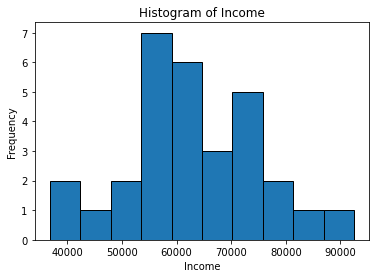

In [38]:
import matplotlib.pyplot as plt

# Plot histogram of age
plt.hist(df['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Plot histogram of income
plt.hist(df['income'], bins=10, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

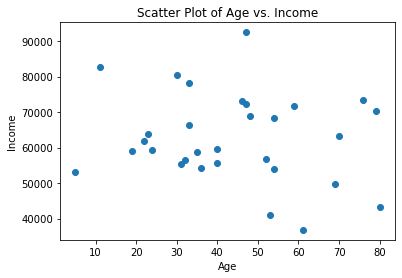

In [39]:
# Create a scatter plot of age vs. income
plt.scatter(df['age'], df['income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Scatter Plot of Age vs. Income')
plt.show()

`Intercept` parameter is interpreted as the `mean of the response` when `each predictor is zero`.  
* Here predictors are age and income and response is Bird_rating

`slope` parameter in multiple linear regression is interpreted as the `average change in the response for a one-unit increase in the value of the corresponding predictor, holding other predictors constant`.

* We have two problems :- 
    
    1. `zero is not a meaningful value for the age predictor`.
    2. `do we really care about how a "one dollar increase in (yearly) salary" impacts Bird_rating? Probably not. It would be more convenient to interpret the change Bird_rating with respect to bigger jumps in income, say, one thousand dollar increases.`

To better assess and interpret the affect of the predictors on Bird_rating, we can changes our scales! Let's start by centering our data, which requires setting the mean of each predictor equal to  0 and then we can subtract the mean value of each predictor from each value. 

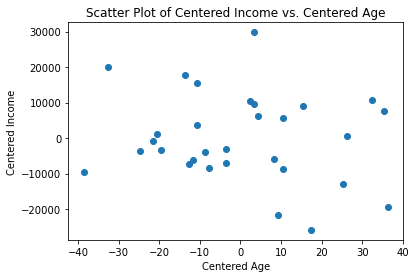

In [40]:
# Center the age and income data
age_centered = df['age'] - df['age'].mean()
income_centered = df['income'] - df['income'].mean()

# Create a data frame with the centered data
df_centered = pd.DataFrame({'age': age_centered, 'income': income_centered})

# Plot a scatter plot using the centered data
plt.scatter(df_centered['age'], df_centered['income'])
plt.xlabel('Centered Age')
plt.ylabel('Centered Income')
plt.title('Scatter Plot of Centered Income vs. Centered Age')
plt.show()

In [41]:
df_centered.head()

,age,income
0,-10.633333,3723.333333
1,-3.633333,-7076.666667
2,32.366667,10723.333333
3,2.366667,10523.333333
4,3.366667,9623.333333


In [42]:
#https://www.theanalysisfactor.com/center-on-the-mean/

In [43]:
# This approach will solve our intercept problem.

Still the range of the predictors is very different, which means that our slope interpretations will still be awkward. 

Solution: -

We know that the `"spread"` of a variable is represented by its standard deviation. 
Therefore, if we divide the centered predictors by their standard deviation, the new "standardized" age and income variables will both have the same spread. 
 
Note that the `process of both centering and scaling data' is called 'standardizing`.

In [44]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

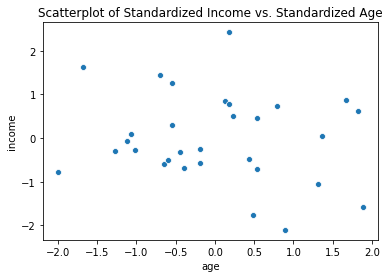

In [45]:
# Standardize the age and income predictors
scaler = StandardScaler()
age_stand = scaler.fit_transform(df[['age']])
income_stand = scaler.fit_transform(df[['income']])

# Create a data frame with the standardized data
df_stand = pd.DataFrame({'age': age_stand.flatten(), 'income': income_stand.flatten(), 'Bird_rating': df['Bird_rating']})

# Plot the standardized data using ggplot
g_stand = sns.scatterplot(data=df_stand, x='age', y='income')
g_stand.set(title='Scatterplot of Standardized Income vs. Standardized Age')
plt.show()

In [46]:
df_stand.head()

,age,income,Bird_rating
0,-0.549666,0.302668,1
1,-0.187817,-0.575259,-2
2,1.673121,0.871695,-1
3,0.122339,0.855437,-4
4,0.174032,0.782277,-4


Note that this should fix the interpretation of the slope parameters: 

Note :- Remember if `we were to use the standardized variables` in a `regression`, a `"one-unit increase"` would be a `"one-standard deviation increase"!`

So we just did a bunch of math, and now people can have a negative age and income? Of course not! Instead, we've just changed the units; the new units measure income but are centered at zero, with a "standard" spread. In addition, the order of the data is still preserved. Let's visualize the resulting predictors!

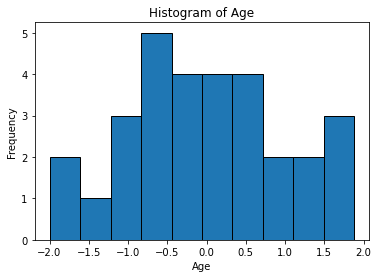

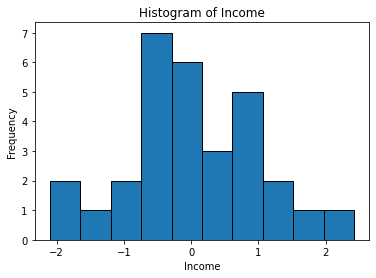

In [47]:
import matplotlib.pyplot as plt

# Plot histogram of age
plt.hist(df_stand['age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Plot histogram of income
plt.hist(df_stand['income'], bins=10, edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')
plt.show()

Now that we have standardized versions of the predictors, let's see how they are related to the response variable

* `we made a claim that standardizing the data could affect our best fit line. Let's see if that claim is true.`

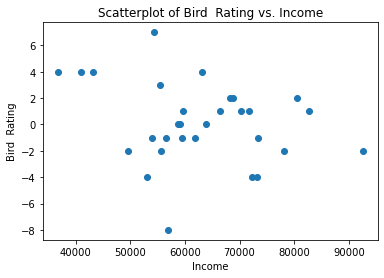

Bird  Slope: -6.339418588780016e-05


In [62]:
# Create scatterplot
plt.scatter(df['income'], df['Bird_rating'])
plt.xlabel('Income')
plt.ylabel('Bird  Rating')
plt.title('Scatterplot of Bird  Rating vs. Income')

# Fit a linear regression model
coefficients = np.polyfit(df['income'], df['Bird_rating'], 1)
Bird_slope = coefficients[0]

# Display the scatterplot
plt.show()

print('Bird  Slope:', Bird_slope)

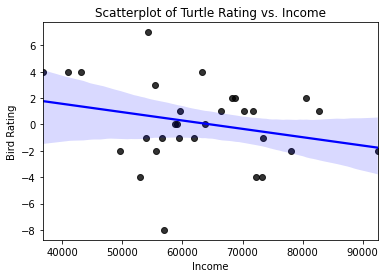

In [49]:
# Create scatterplot with regression line
sns.regplot(x='income', y='Bird_rating', data=df, color='blue', scatter_kws={'color': 'black'})
plt.xlabel('Income')
plt.ylabel('Bird Rating')
plt.title('Scatterplot of Turtle Rating vs. Income')

# Display the scatterplot with regression line
plt.show()

Do the same work With "standardized data"

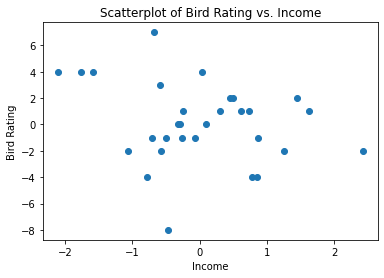

Bird Slope: -0.779856168927211


In [50]:
# Create scatterplot
plt.scatter(df_stand['income'], df_stand['Bird_rating'])
plt.xlabel('Income')
plt.ylabel('Bird Rating')
plt.title('Scatterplot of Bird Rating vs. Income')

# Fit a linear regression model
coefficients = np.polyfit(df_stand['income'], df_stand['Bird_rating'], 1)
turtle_slope = coefficients[0]

# Display the scatterplot
plt.show()

print('Bird Slope:', turtle_slope)

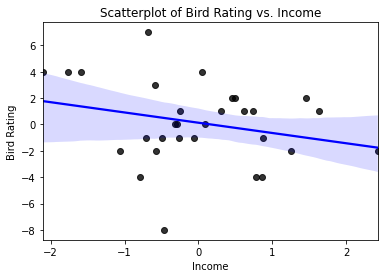

In [51]:
# Create scatterplot with regression line
sns.regplot(x='income', y='Bird_rating', data=df_stand, color='blue', scatter_kws={'color': 'black'})
plt.xlabel('Income')
plt.ylabel('Bird Rating')
plt.title('Scatterplot of Bird Rating vs. Income')

# Display the scatterplot with regression line
plt.show()

In [52]:

import scipy as sp
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [53]:
predictors = ['age', 'income']
model1 = smf.ols(formula='Bird_rating ~ age + income', data=df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            Bird_rating   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.303
Date:                Thu, 01 Jun 2023   Prob (F-statistic):              0.288
Time:                        15:05:53   Log-Likelihood:                -74.226
No. Observations:                  30   AIC:                             154.5
Df Residuals:                      27   BIC:                             158.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7718      3.337      0.831      0.4

In [55]:
df_stand.head()

,age,income,Bird_rating
0,-0.549666,0.302668,1
1,-0.187817,-0.575259,-2
2,1.673121,0.871695,-1
3,0.122339,0.855437,-4
4,0.174032,0.782277,-4


In [56]:
predictors = ['age', 'income']
model1 = smf.ols(formula='Bird_rating ~ age + income', data=df_stand).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:            Bird_rating   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.303
Date:                Thu, 01 Jun 2023   Prob (F-statistic):              0.288
Time:                        15:06:24   Log-Likelihood:                -74.226
No. Observations:                  30   AIC:                             154.5
Df Residuals:                      27   BIC:                             158.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1333      0.553      0.241      0.8

* A :- `a 1 unit increase in the standardized predictor represents a change of 1 standard deviation from the mean of the predictor variable.`

